In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm

## Ex. 5.3

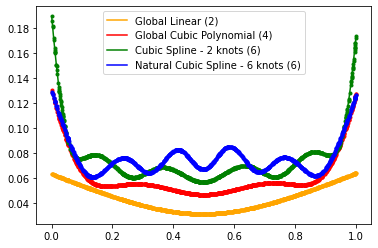

In [2]:
def pc(x, loc):
    return ((x - loc) ** 3) * (x > loc)
    
x = np.sort(uniform.rvs(size = 1000)).reshape([-1, 1])
X_Linear = np.hstack([np.ones_like(x), x])
X_Cubic = np.hstack([X_Linear, x ** 2, x ** 3])
X_Cubic_Spline = np.hstack([X_Cubic, pc(x, 1/3), pc(x, 2/3)])
knots = np.linspace(0.1, 0.9, 6)
X_tmp = np.hstack([(pc(x, knot) - pc(x, knots[-1])) / (knots[-1] - knot) for knot in knots[:-1]])
X_tmp = X_tmp[:, :-1] - X_tmp[:, -1].reshape([-1, 1])
X_Natural_Cubic_Spline  = np.hstack([X_Linear, X_tmp])

def pv(X):
    return np.sqrt(np.diag(X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)))

plt.plot(x.flatten(), pv(X_Linear), '.', c='orange')
plt.plot(x.flatten(), pv(X_Linear), c='orange', label='Global Linear ({})'
         .format(X_Linear.shape[1]))
plt.plot(x.flatten(), pv(X_Cubic), '.', c='red')
plt.plot(x.flatten(), pv(X_Cubic), c='red', label='Global Cubic Polynomial ({})'
         .format(X_Cubic.shape[1]))
plt.plot(x.flatten(), pv(X_Cubic_Spline), '.', c='green')
plt.plot(x.flatten(), pv(X_Cubic_Spline), c='green', label='Cubic Spline - 2 knots ({})'
         .format(X_Cubic_Spline.shape[1]))
plt.plot(x.flatten(), pv(X_Natural_Cubic_Spline), '.', c='blue')
plt.plot(x.flatten(), pv(X_Natural_Cubic_Spline), c='blue', label='Natural Cubic Spline - 6 knots ({})'
         .format(X_Natural_Cubic_Spline.shape[1]))
plt.legend()
plt.show()